In [5]:
import STARTG01_AVLmodel
import numpy as np
import Drag_Build_Up # python file that calculates individual components zero lift drag
import MiscDrag
import matplotlib.pyplot as plt
# import FlapDrag

$$
C_{D_0}=\frac{1}{S_{\text {ref }}} \Sigma_{c=1}^{n_{\text {component }}}\left(C_{f_c} F F_c Q_c S_{\text {wet }}\right)+C_{D_{\text {mis }}}+C_{D_{L \& P}}
$$
$S_{\text {ref }}$: Wing reference area <br>
$C_{f_c}$: Skin friction coefficient for component $c$ <br>
$F F_c$: Form factor for component $c$<br>
$Q_c$: Interference factor for component $c$ <br>
$S_{wet}$: Wetted surface area of component $c$ <br>
$C_{D_{\text {mis }}}$: Missing drag due to components with large form drag<br>
$C_{D_{L \& P}}$: Leakage/protuberance drag<br>

In [6]:

CL1=[]
CD1=[]
for i in range(-15,15+1):
    CL,CD = STARTG01_AVLmodel.STARTG01_AVL(1,i,1)
    CL1 += [CL]
    CD1 += [CD]

CL2=[]
CD2=[]
for i in range(-15,15+1):
    CL,CD = STARTG01_AVLmodel.STARTG01_AVL(2,i,1)
    CL2 += [CL]
    CD2 += [CD]

CL3=[]
CD3=[]
for i in range(-15,15+1):
    CL,CD = STARTG01_AVLmodel.STARTG01_AVL(3,i,1)
    CL3 += [CL]
    CD3 += [CD]

CL4=[]
CD4=[]
for i in range(-15,15+1):
    CL,CD = STARTG01_AVLmodel.STARTG01_AVL(4,i,1)
    CL4 += [CL]
    CD4 += [CD]

CL5=[]
CD5=[]
for i in range(-15,15+1):
    CL,CD = STARTG01_AVLmodel.STARTG01_AVL(5,i,1)
    CL5 += [CL]
    CD5 += [CD]


In [7]:
# Define parameters
S_ref = 826.13454               # reference area

'''
Legend for flight_stg:

1 = clean
2 = takeoff flaps, gear up
3 = takeoff flaps, gear down
4 = landing flaps, gear up
5 = landing flaps, gear down

'''
flight_stages = [1, 2, 3, 4, 5]

# Flight conditions for each flight condition
M =     [0.457, 0.183, 0.183, 0.15, 0.15]                                                 # Mach Numbers
rho =   [0.1152e-02, 0.0023769, 0.0023769, 0.0023769, 0.0023769]                  # Densities
V =     [275*1.6878099,  1.3*157.3,  1.3*157.3, 1.3*128.4, 1.3*128.4]     # Velocities
mu =    [3.246e-7, 3.784e-7, 3.784e-7, 3.784e-7, 3.784e-7]                             # Dynamic Viscosities



'''
We need to put the following code into a for loop to get an array of Cd0 values that correspond 
to the five flight stages. Then we can combine the CD0 values with the avl values to get our full 
drag polars 
'''


# Loop that ouputs an array of CD0 values corresponding to our 5 flight stages
CD0s = []
for i in range(len(flight_stages)):
    all_components = Drag_Build_Up.dragDragComponents(M[i], rho[i], V[i], mu[i])
    Sumcomps = (1/S_ref) * sum([component.CalculateDrag() for component in all_components])
    C_D_leakpro = 0.07 * Sumcomps
    C_D_missing = MiscDrag.miscDrag(M[i], flight_stages[i])

    # print("Flight Stage", flight_stages[i])
    # print("Wing: ", all_components[0].CalculateDrag() / S_ref)
    # print("hTail: ", all_components[1].CalculateDrag() / S_ref)
    # print("vTail: ", all_components[2].CalculateDrag() / S_ref)
    # print("Fuselage: ", all_components[3].CalculateDrag() / S_ref)
    # print("Nacelle: ", all_components[4].CalculateDrag() / S_ref)


    CD0s.append(Sumcomps + C_D_leakpro + C_D_missing)
print(CD0s)

# for i in range(len(flight_stages)):
#     Cdflap = FlapDrag.flapDrag(flight_stages[i])

# Cl's corresponding to the flight stages defined above
# cl1 = 
# cl2 = 
# cl3 = 
# cl4 = 
# cl5 = 




[0.01719378834386854, 0.01628368580306468, 0.017373096736058715, 0.017140601793798765, 0.018230012726792803]


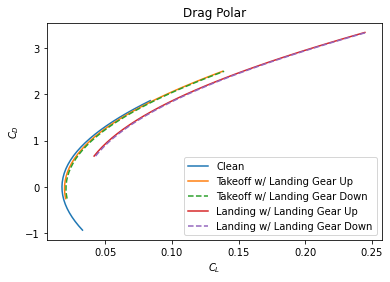

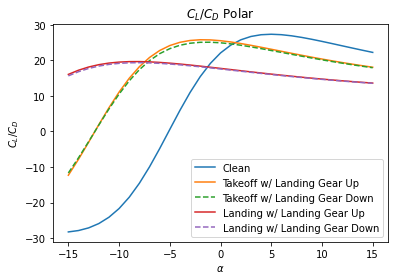

In [8]:
# plt.plot(CL1,CD1)
# plt.plot(CL2,CD2)
# plt.plot(CL3,CD3)
# plt.plot(CL4,CD4)
# plt.plot(CL5,CD5)

# plt.figure()

plt.plot((CD0s[0]+CD1), CL1, label='Clean')
plt.plot((CD0s[1]+CD2),CL2,label='Takeoff w/ Landing Gear Up')
plt.plot((CD0s[2]+CD3),CL3,'--',label='Takeoff w/ Landing Gear Down')
plt.plot((CD0s[3]+CD4), CL4,label='Landing w/ Landing Gear Up')
plt.plot((CD0s[4]+CD5),CL5,'--',label='Landing w/ Landing Gear Down')
plt.xlabel('$C_L$')
plt.ylabel('$C_D$')
plt.title('Drag Polar')
plt.legend()
#plt.savefig('FinalDragPolar.svg')


plt.figure()
plt.plot(range(-15,15+1),CL1/(CD0s[0]+CD1),label='Clean')
plt.plot(range(-15,15+1),CL2/(CD0s[1]+CD2),label='Takeoff w/ Landing Gear Up')
plt.plot(range(-15,15+1),CL3/(CD0s[2]+CD3),'--',label='Takeoff w/ Landing Gear Down')
plt.plot(range(-15,15+1),CL4/(CD0s[3]+CD4),label='Landing w/ Landing Gear Up')
plt.plot(range(-15,15+1),CL5/(CD0s[4]+CD5),'--',label='Landing w/ Landing Gear Down')
plt.xlabel('$\\alpha$')
plt.ylabel('$C_L/C_D$')
plt.title('$C_L/C_D$ Polar')
plt.legend()
#plt.savefig('FinalClCd.svg')
